#### Precision agriculture is in trend nowadays. It helps the farmers to get informed decision about the farming strategy. Here, I present you a dataset which would allow the users to build a predictive model to recommend the most suitable crops to grow in a particular farm based on various parameters.

Context

This dataset was build by augmenting datasets of rainfall, climate and fertilizer data available for India.



### Data fields

N - ratio of Nitrogen content in soil

P - ratio of Phosphorous content in soil

K - ratio of Potassium content in soil

temperature - temperature in degree Celsius

humidity - relative humidity in %

ph - ph value of the soil

rainfall - rainfall in mm

In [1]:
import pandas as pd
import seaborn as sns 
import matplotlib.pyplot as plt 

In [2]:
df = pd.read_csv("/Users/mayurimamdi/Downloads/Crop_recommendation.csv")

In [3]:
df.head()

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2200 entries, 0 to 2199
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   N            2200 non-null   int64  
 1   P            2200 non-null   int64  
 2   K            2200 non-null   int64  
 3   temperature  2200 non-null   float64
 4   humidity     2200 non-null   float64
 5   ph           2200 non-null   float64
 6   rainfall     2200 non-null   float64
 7   label        2200 non-null   object 
dtypes: float64(4), int64(3), object(1)
memory usage: 137.6+ KB


In [5]:
df['label'].value_counts()

label
rice           100
maize          100
jute           100
cotton         100
coconut        100
papaya         100
orange         100
apple          100
muskmelon      100
watermelon     100
grapes         100
mango          100
banana         100
pomegranate    100
lentil         100
blackgram      100
mungbean       100
mothbeans      100
pigeonpeas     100
kidneybeans    100
chickpea       100
coffee         100
Name: count, dtype: int64

In [6]:
df.shape

(2200, 8)

In [7]:
df.isnull().sum()

N              0
P              0
K              0
temperature    0
humidity       0
ph             0
rainfall       0
label          0
dtype: int64

In [8]:
df.duplicated().sum()

np.int64(0)

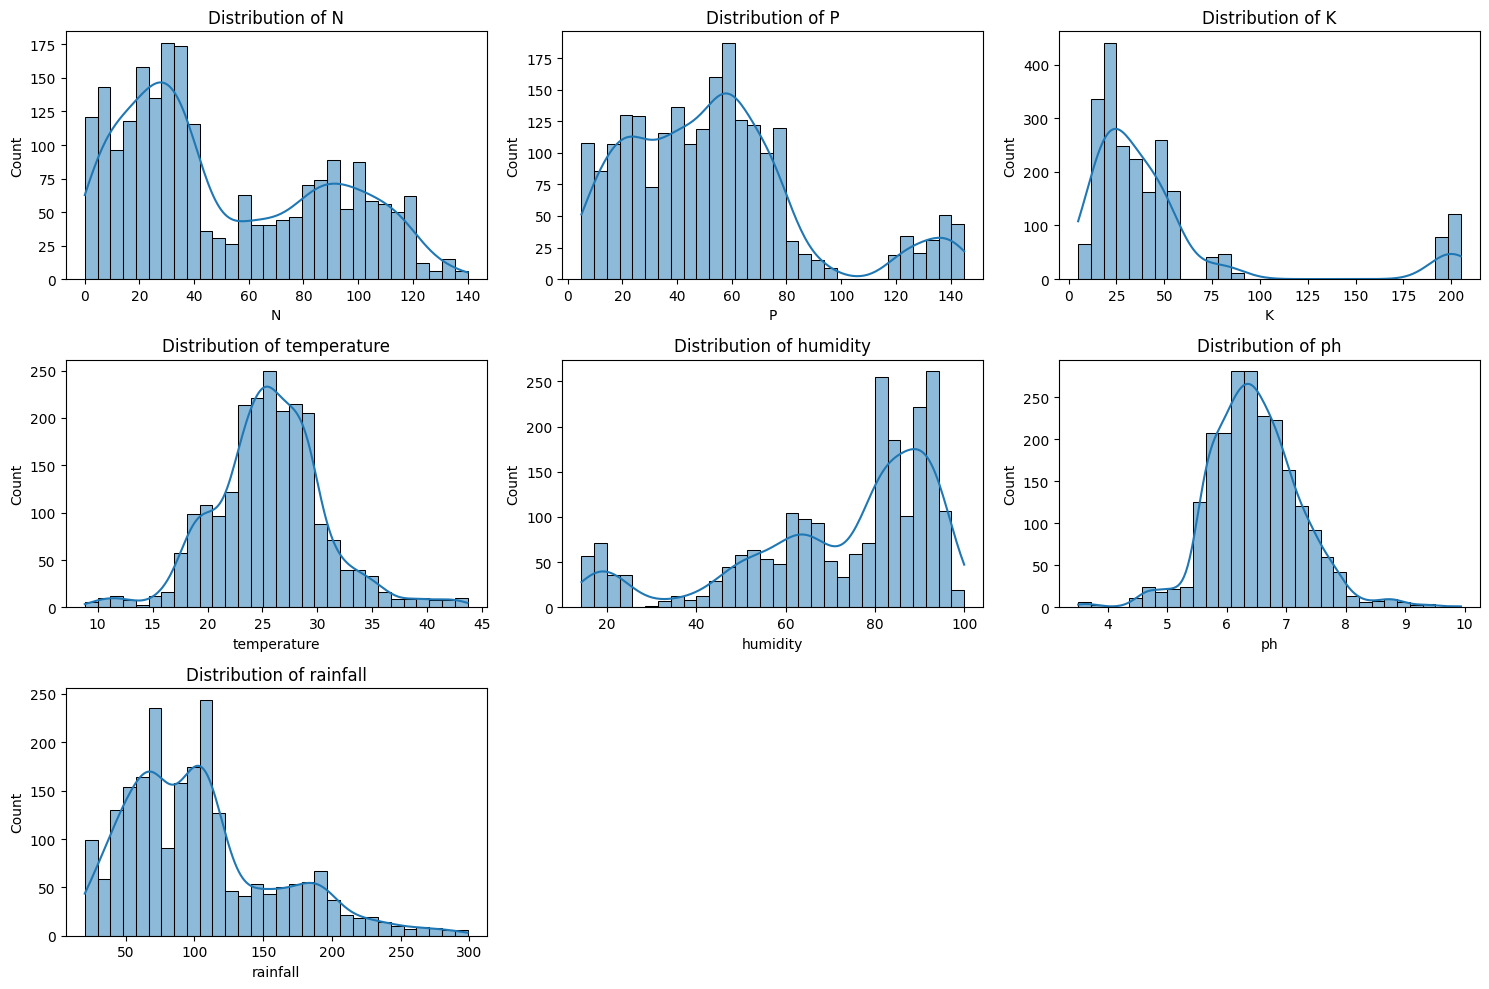

In [ ]:
num_features = ['N','P','K','temperature','humidity','ph','rainfall']

plt.figure(figsize=(15,10))
for i, col in enumerate(num_features, 1):
    plt.subplot(3, 3, i)
    sns.histplot(df[col], kde=True, bins=30)
		plt.title(f'Distribution of {col}')
plt.tight_layout()
plt.show()

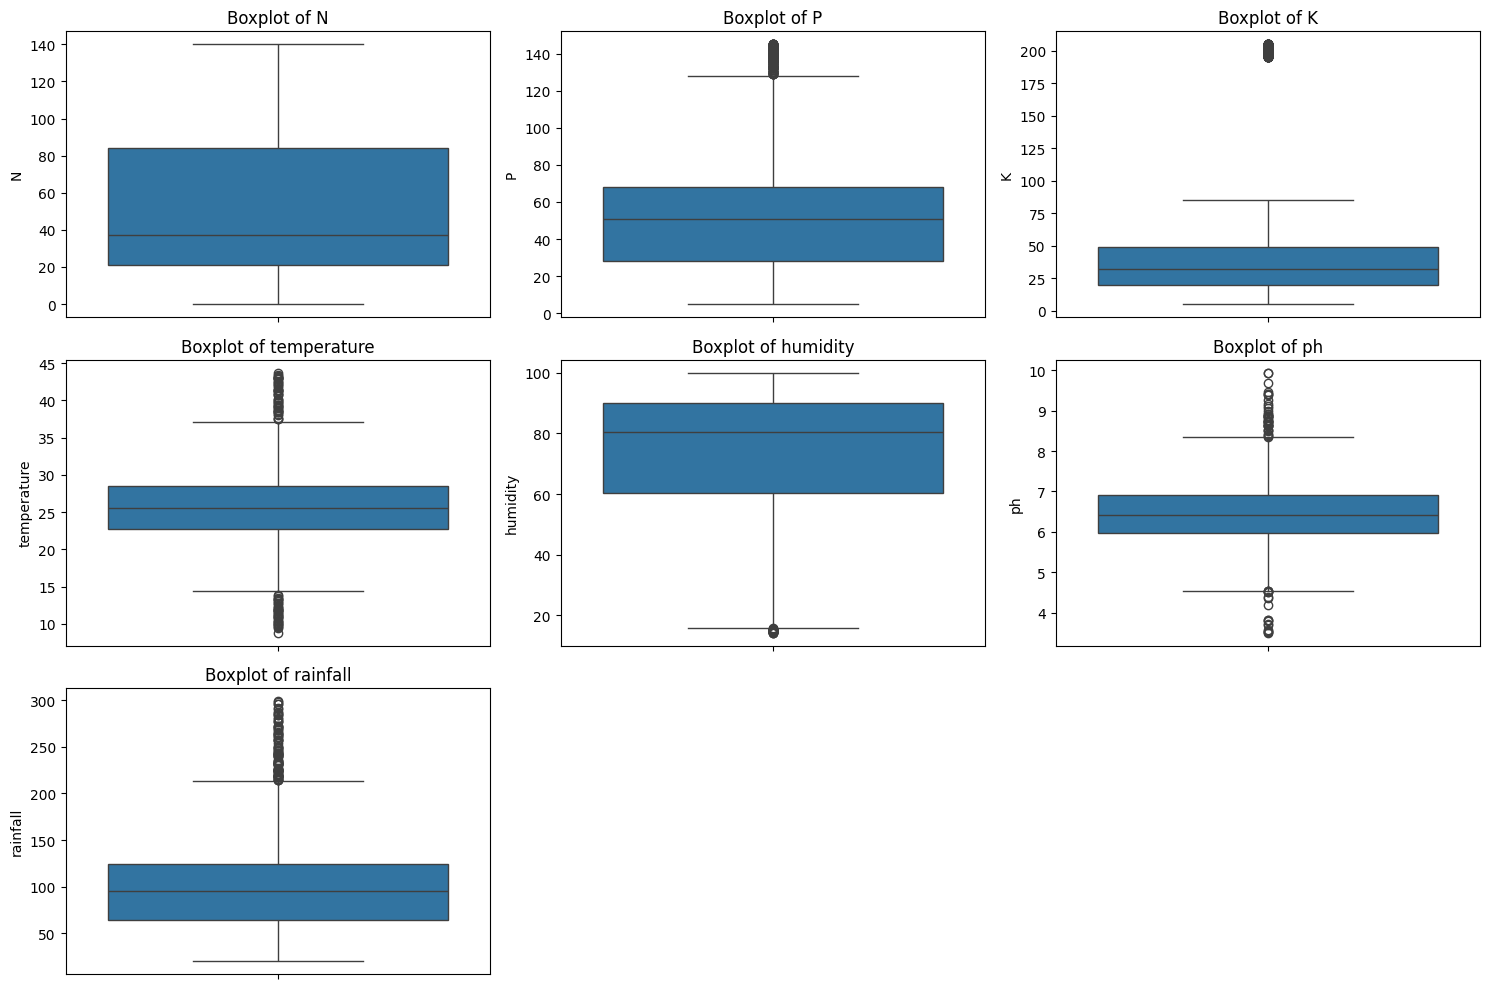

In [22]:
plt.figure(figsize=(15,10))
for i, col in enumerate(num_features, 1):
    plt.subplot(3, 3, i)
    sns.boxplot(y=df[col])
    plt.title(f'Boxplot of {col}')
plt.tight_layout()
plt.show()

In [12]:
cols = df.select_dtypes(['int64','float64'])

In [14]:
cols

,N,P,K,temperature,humidity,ph,rainfall
0,90,42,43,20.879744,82.002744,6.502985,202.935536
1,85,58,41,21.770462,80.319644,7.038096,226.655537
2,60,55,44,23.004459,82.320763,7.840207,263.964248
3,74,35,40,26.491096,80.158363,6.980401,242.864034
4,78,42,42,20.130175,81.604873,7.628473,262.717340
...,...,...,...,...,...,...,...
2195,107,34,32,26.774637,66.413269,6.780064,177.774507
2196,99,15,27,27.417112,56.636362,6.086922,127.924610
2197,118,33,30,24.131797,67.225123,6.362608,173.322839
2198,117,32,34,26.272418,52.127394,6.758793,127.175293


In [15]:
cor=cols.corr()

<Axes: >

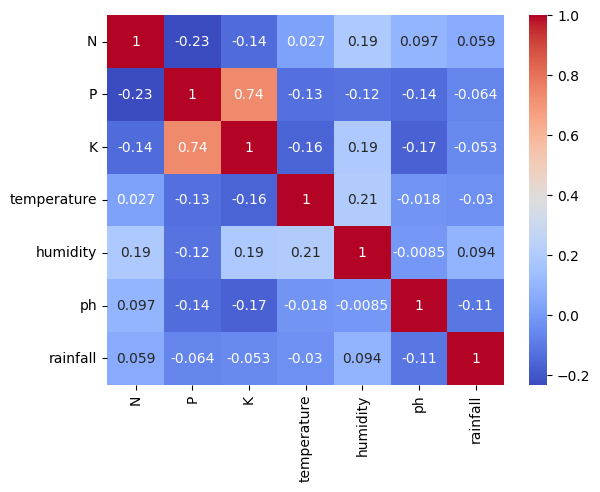

In [16]:
sns.heatmap(cor, annot=True, cmap='coolwarm')

<Axes: xlabel='humidity', ylabel='N'>

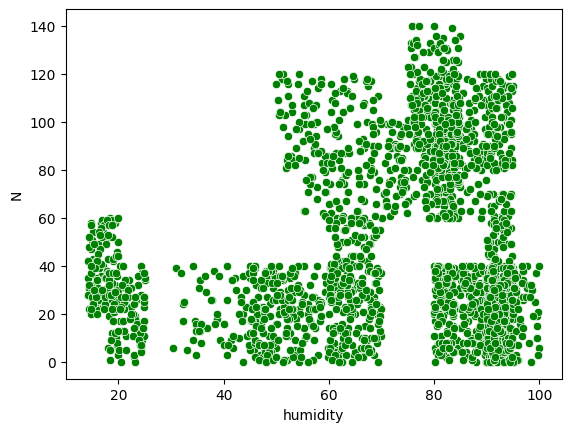

In [17]:
sns.scatterplot(x='humidity', y='N', data=df, color='green')

<Axes: ylabel='temperature'>

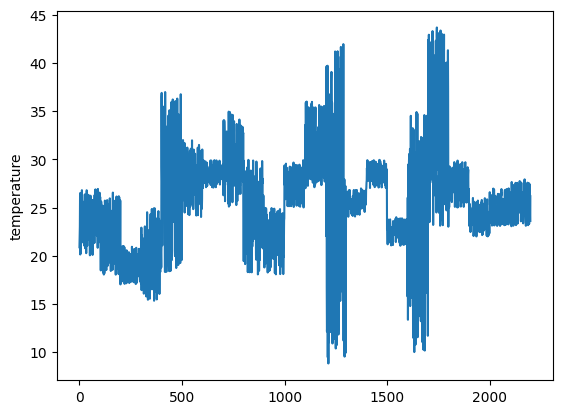

In [20]:
sns.lineplot(df['temperature'])

<Figure size 1200x600 with 0 Axes>

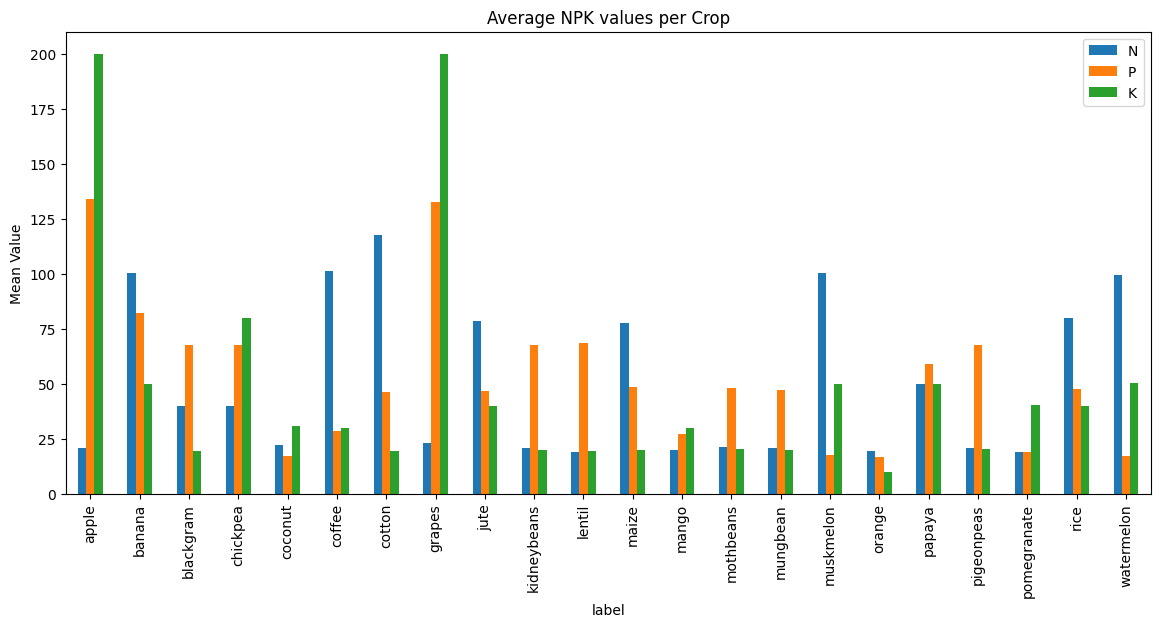

In [26]:
plt.figure(figsize=(12,6))
avg_values = df.groupby("label")[['N','P','K']].mean()
avg_values.plot(kind="bar", figsize=(14,6))
plt.title("Average NPK values per Crop")
plt.ylabel("Mean Value")
plt.show()